In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib import ticker

IMAGE_SHAPE = (115,400)

In [2]:
def calc_mem_usage(input_image_shape, crop_size_arr, crop_step_arr):
    Z = np.zeros(crop_step_arr.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            if crop_size_arr[i,j] < crop_step_arr[i,j]:
                Z[i,j] = 0
                continue
                
            # расчет кол-ва кропов
            crops_per_x_axis = len(np.zeros((input_image_shape[0]-(crop_size_arr[i,j]-1)))[::crop_step_arr[i,j]])
            crops_per_y_axis = len(np.zeros((input_image_shape[1]-(crop_size_arr[i,j]-1)))[::crop_step_arr[i,j]])
            crops_count = crops_per_x_axis * crops_per_y_axis
            
            # расчет кол-ва занимаемой памяти
            mem_usage = crops_count * crop_size_arr[i,j]**2
            Z[i,j] = mem_usage
            
    return Z

In [3]:
crop_size_array = np.arange(1, IMAGE_SHAPE[0]+1, 1, dtype='int')
crop_step_array = np.arange(1, IMAGE_SHAPE[0]+1, 1, dtype='int') 
crop_size_array, crop_step_array = np.meshgrid(crop_size_array, crop_step_array)

mem_usage_array = calc_mem_usage(IMAGE_SHAPE, crop_size_array, crop_step_array)

In [4]:
def draw_map(mem_usage_matrix):
    fig, ax = plt.subplots()

    fig.set_figwidth(10)
    fig.set_figheight(10)
    
    ax.set_xlabel('Размер кропа', fontsize=15) 
    ax.set_ylabel('Шаг нарезки', fontsize=15) 
    ax.set_title(f'Зависимость затрат памяти от размера кропа и шага нарезки', fontsize=15) 
    ax.pcolormesh(mem_usage_matrix)
    ax.plot([0,mem_usage_matrix.shape[1]],[0,mem_usage_matrix.shape[0]], c='red')
    
    plt.show()

In [6]:
temp = 0      
for i in range(mem_usage_array.shape[0]):
    for j in range(mem_usage_array.shape[1]):
        if mem_usage_array[i,j] >= temp:
            temp = mem_usage_array[i,j]

In [10]:
for i in range(mem_usage_array.shape[0]):
    for j in range(mem_usage_array.shape[1]):
        if mem_usage_array[i,j] == temp:
            print(f'i: {i+1}, j: {j+1}, val: {mem_usage_array[i,j]}')

i: 1, j: 74, val: 75207384.0


In [11]:
75_207_384 * 0.0025 

188018.46

In [12]:
188_018.46 / 46000

4.087357826086956

In [13]:
75_207_384 / 46000

1634.9431304347827

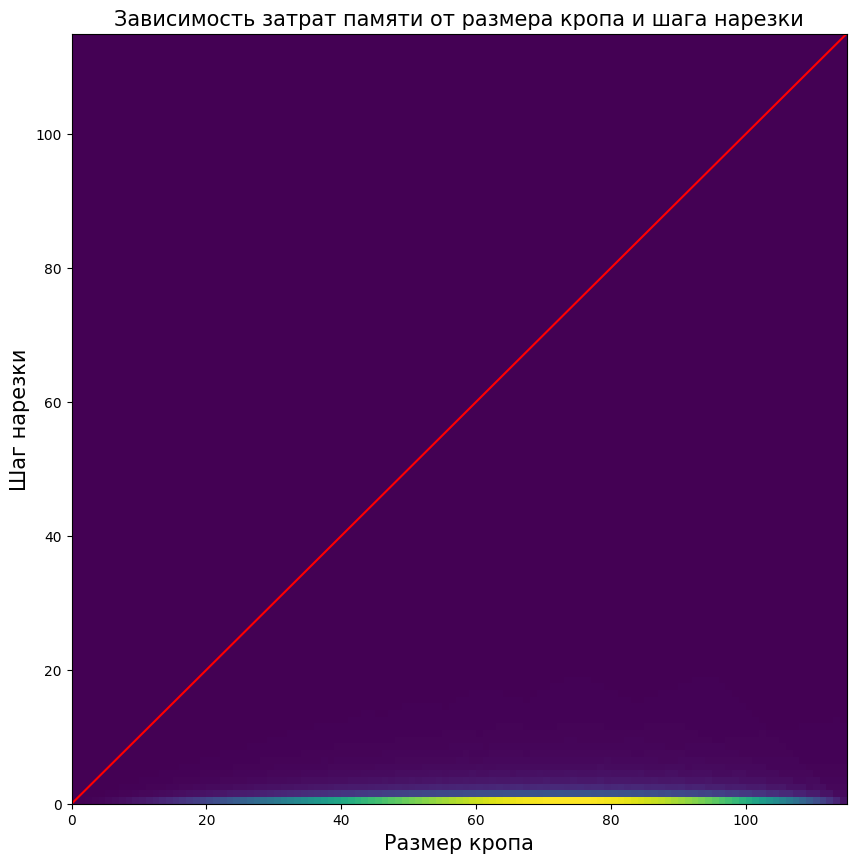

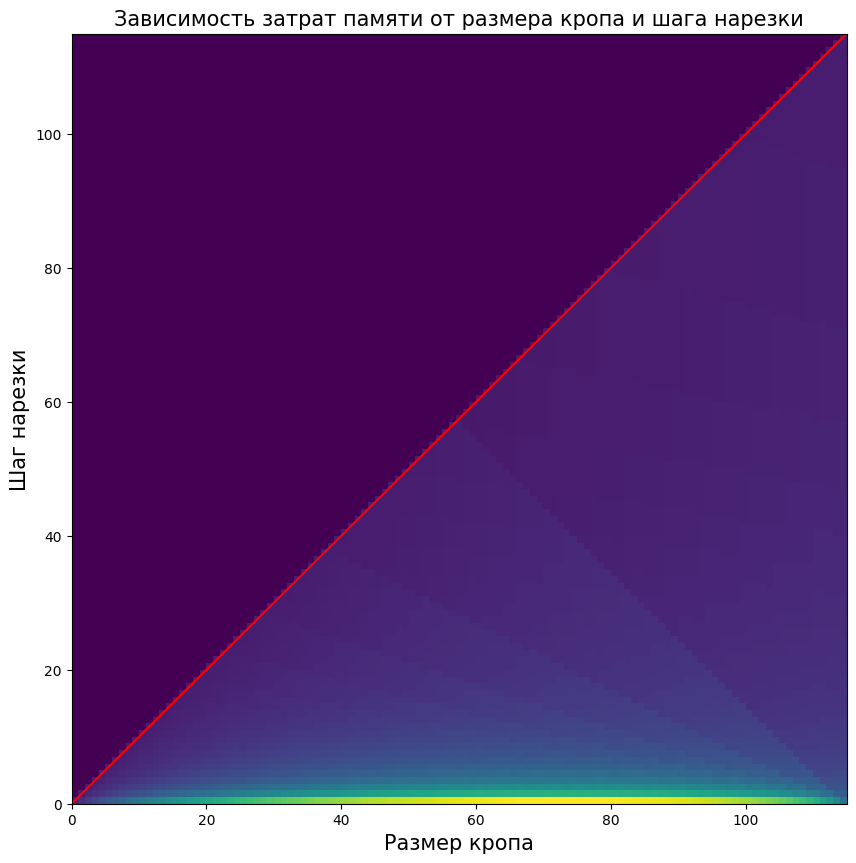

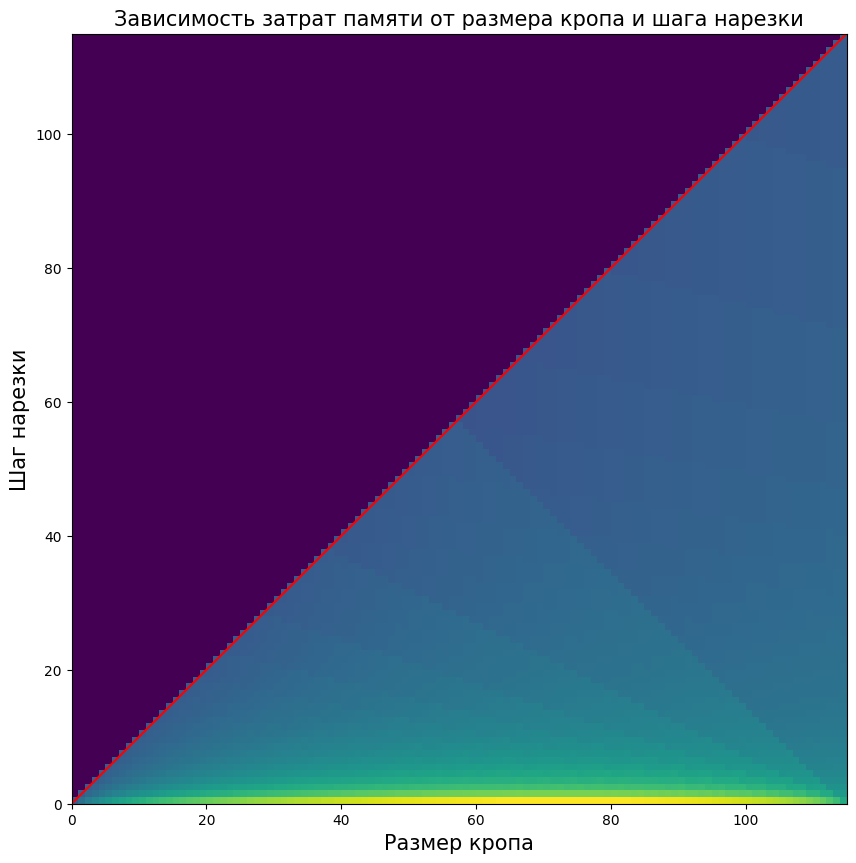

In [5]:
draw_map(mem_usage_array)
draw_map(np.cbrt(mem_usage_array))
draw_map(np.sqrt(np.cbrt(mem_usage_array)))

In [6]:
temp_arr = []
for i in range(mem_usage_array.shape[0]):
    for j in range(mem_usage_array.shape[1]):
        if mem_usage_array[i,j] != 0:
            temp_arr.append(mem_usage_array[i,j])

temp_arr = np.array(temp_arr) 
temp_arr = temp_arr/temp_arr.max()

In [7]:
def draw_hist(arr): # , major_x_formatter, minor_x_formatter, major_x_formatter_str, minor_x_formatter_str):
    # Plot the surface
    fig, ax = plt.subplots()
    
    fig.set_figwidth(18)
    fig.set_figheight(6)         
    
    ax.hist(arr, bins=20)
    
    ax.set_xlabel('Диапазон', fontsize=15) 
    ax.set_ylabel('Кол-во кропов', fontsize=15) 
    ax.set_title('Распределение нормализованных величин затрат памяти (от 0 до 1)', fontsize=15) 
    
    #  Устанавливаем интервал основных делений: 
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(major_x_formatter))
    #ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_x_formatter)) 
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(500)) 
     
    #  Устанавливаем форматирование чисел основных делений: 
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(major_x_formatter_str)) 
    #ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter(minor_x_formatter_str))
    #ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.d')) 
     
    #  Устанавливаем форматирование делений: 
    ax.xaxis.set_tick_params(which = 'major', labelsize = 15) 
    #ax.xaxis.set_tick_params(which = 'minor', labelsize = 10) 
    ax.yaxis.set_tick_params(which = 'major', labelsize = 15) 
         
    plt.show()

In [8]:
len(temp_arr)

6670

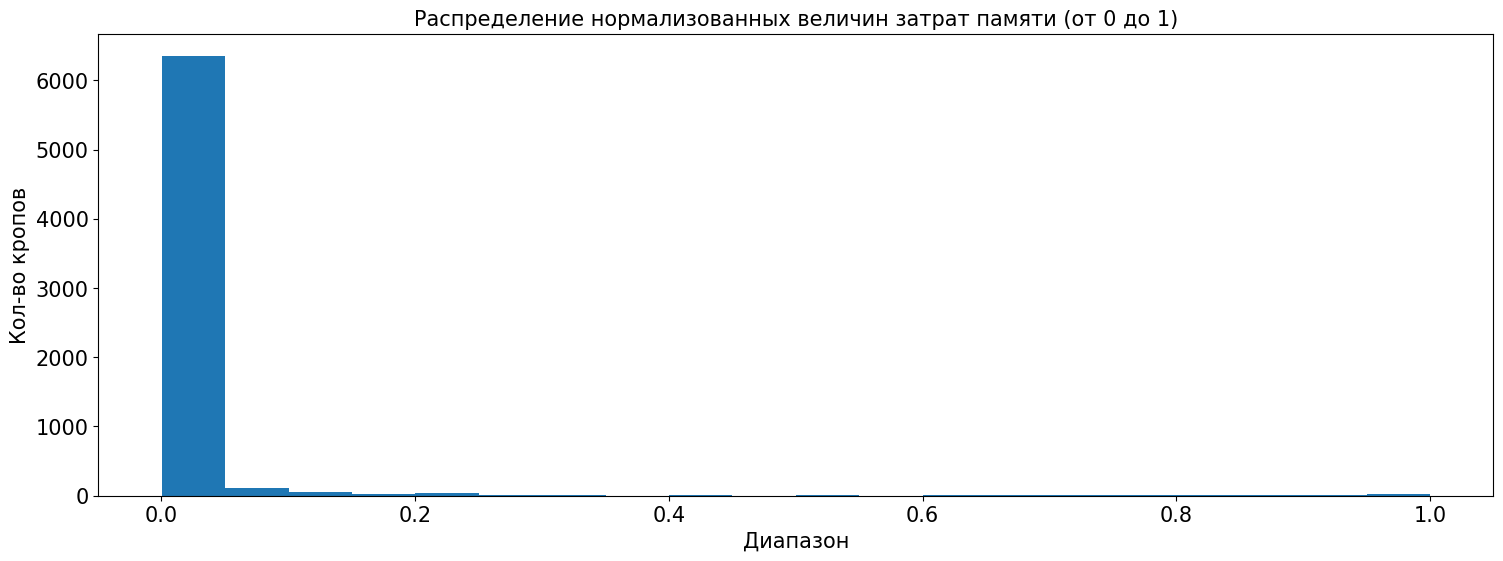

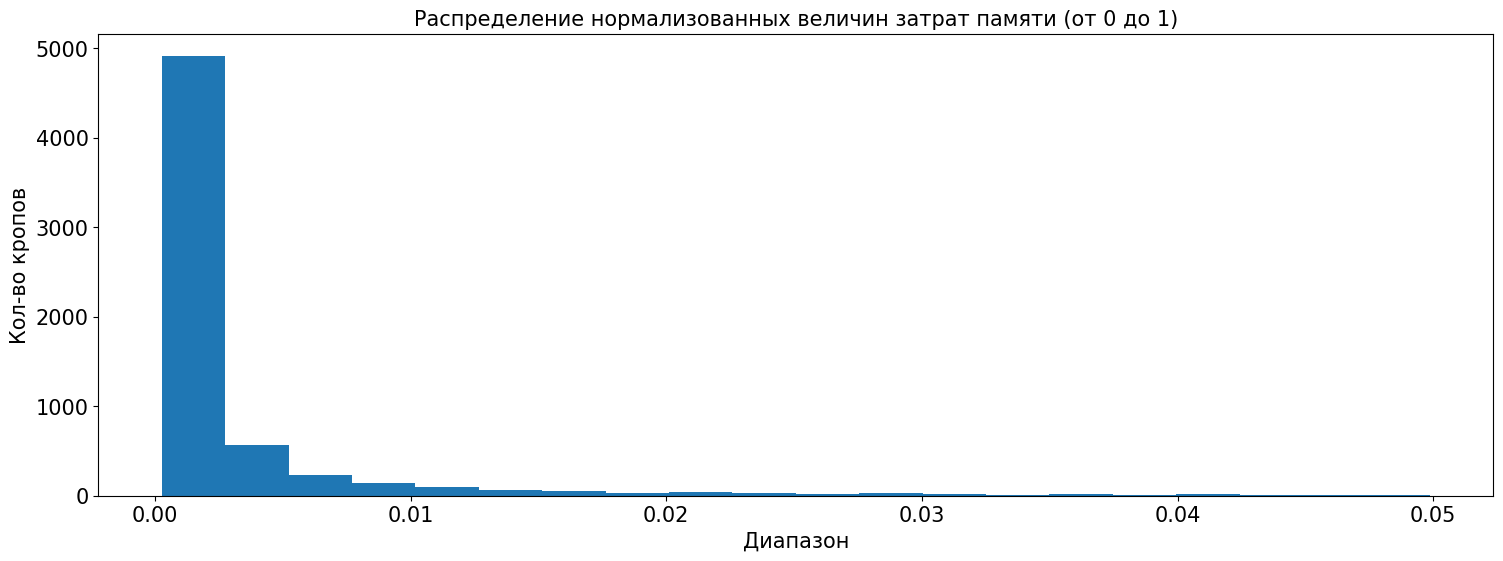

In [9]:
draw_hist(temp_arr)#,1/5, 1/20, '%.1f', '%.2f')
draw_hist(temp_arr[temp_arr<=0.05])#, 0.1/5, 0.1/20, '%.2f', '%.3f')
#draw_hist(temp_arr[temp_arr<=0.01])#, 0.01/5, 0.01/20, '%.2f', '%.3f')

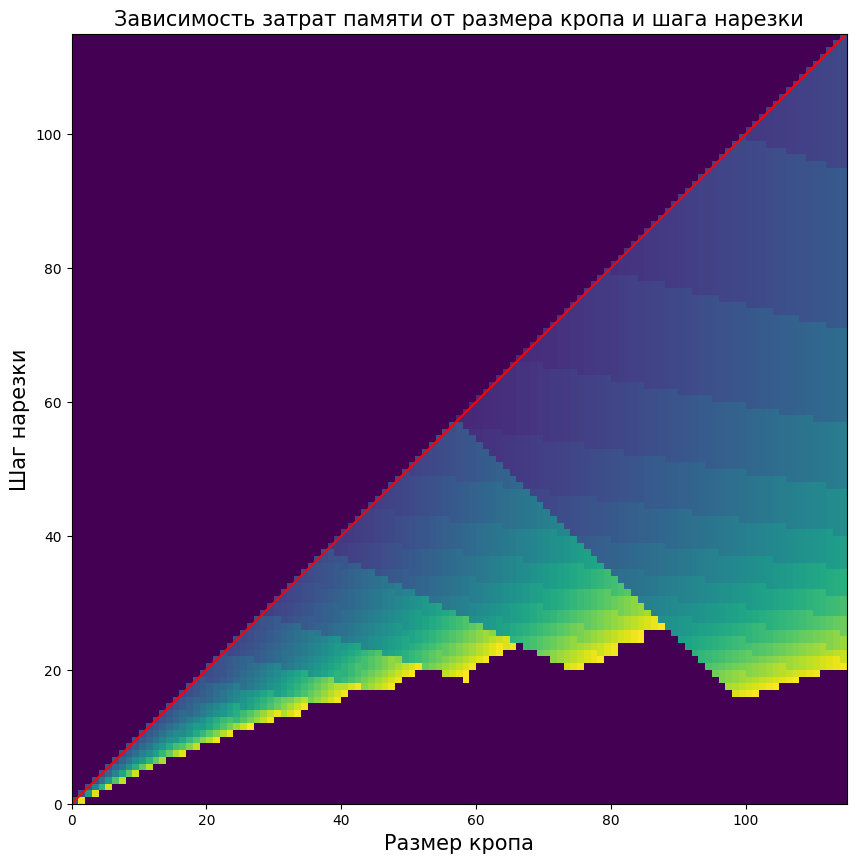

In [10]:
# прикинем где находятся соотношения, относящиеся к диапазону от 0 до 0.001
temp_arr = np.zeros(mem_usage_array.shape)
for i in range(mem_usage_array.shape[0]):
    for j in range(mem_usage_array.shape[1]):
        temp = mem_usage_array[i,j] / mem_usage_array.max()
        if temp <= 0.0025:
            temp_arr[i,j] = temp

fig, ax = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(10)

ax.set_xlabel('Размер кропа', fontsize=15) 
ax.set_ylabel('Шаг нарезки', fontsize=15) 
ax.set_title(f'Зависимость затрат памяти от размера кропа и шага нарезки', fontsize=15) 
ax.pcolormesh(temp_arr)
ax.plot([0,temp_arr.shape[1]],[0,temp_arr.shape[0]], c='red')

plt.show()

In [11]:
1556661850 * 0.0025

3891654.625

In [16]:
115*400 

46000

In [18]:
1556661850/46000

33840.475

In [12]:
# 3d plot

# Plot the surface
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#fig.set_figwidth(18)
#fig.set_figheight(6)

#ax.plot_surface(crop_size_array,
#                crop_step_array,
#                np.sqrt(np.cbrt(mem_usage_array)), cmap=cm.Blues)

#ax.set_xlabel('Размер кропа', fontsize=15) 
#ax.set_ylabel('Шаг нарезки', fontsize=15) 
#ax.set_zlabel('Затраты памяти', fontsize=15) 
#ax.set_title(f'Зависимость затрат памяти от размера кропа и шага нарезки', fontsize=15) 
#ax.view_init(elev=10, azim=60)

#plt.show()

In [13]:
# Plot the surface
#fig, ax = plt.subplots()

#fig.set_figwidth(18)
#fig.set_figheight(6)
        
#temp_arr=temp_arr/temp_arr.max()
#ax.hist(temp_arr[temp_arr<=0.1])

#plt.show()

In [14]:
# Plot the surface
#fig, ax = plt.subplots()

#fig.set_figwidth(18)
#fig.set_figheight(6)
        
#ax.hist(temp_arr[temp_arr<=0.01])

#plt.show()

In [15]:
# Plot the surface
#fig, ax = plt.subplots()

#fig.set_figwidth(18)
#fig.set_figheight(6)
        
#ax.hist(temp_arr[temp_arr<=0.002])

#plt.show()